In [ ]:
# More in-depth tutorial on this here: 
#https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

from get_data import *

In [2]:
df = pd.DataFrame(data)
df.columns = ['Type','Age','Breed1','Breed2','Gender','Color1','Color2','Color3',
              'Maturity Size','Fur Length','Vaccinated','Dewormed','Sterilized',
              'Health','Quantity','Fee','State','Video Amount','Photo Amount',
              'Sentmt Magnitude','Sentmt Score','Adoption Speed']
df['score*mag'] = df.apply(lambda row: (row['Sentmt Magnitude']*row['Sentmt Score']), axis=1)

In [3]:
X = df.drop('Adoption Speed', axis=1)
target = df['Adoption Speed']

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [ ]:
#RFECV
rfc = RandomForestClassifier(random_state=101, n_estimators=10)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10),  scoring='accuracy', verbose=1)
rfecv.fit(X, target)

In [5]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 19


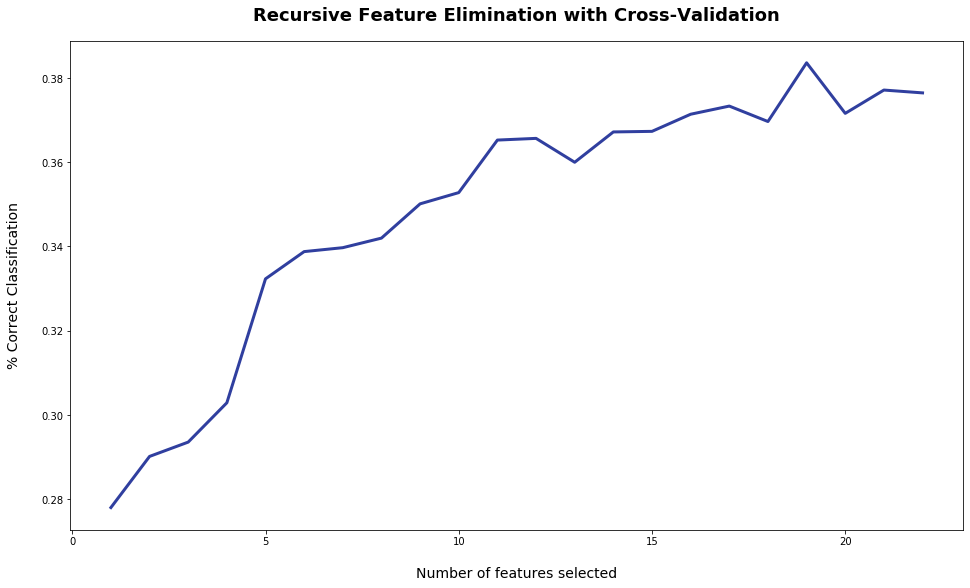

In [6]:
#Plot the accuracy obtained with every number of features used
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [7]:
print( 'Least Important features: ', df.columns[np.where(rfecv.support_ == False)] )

Least Important features:  Index(['Type', 'Health', 'Video Amount'], dtype='object')


In [8]:
#Drop the least important features
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

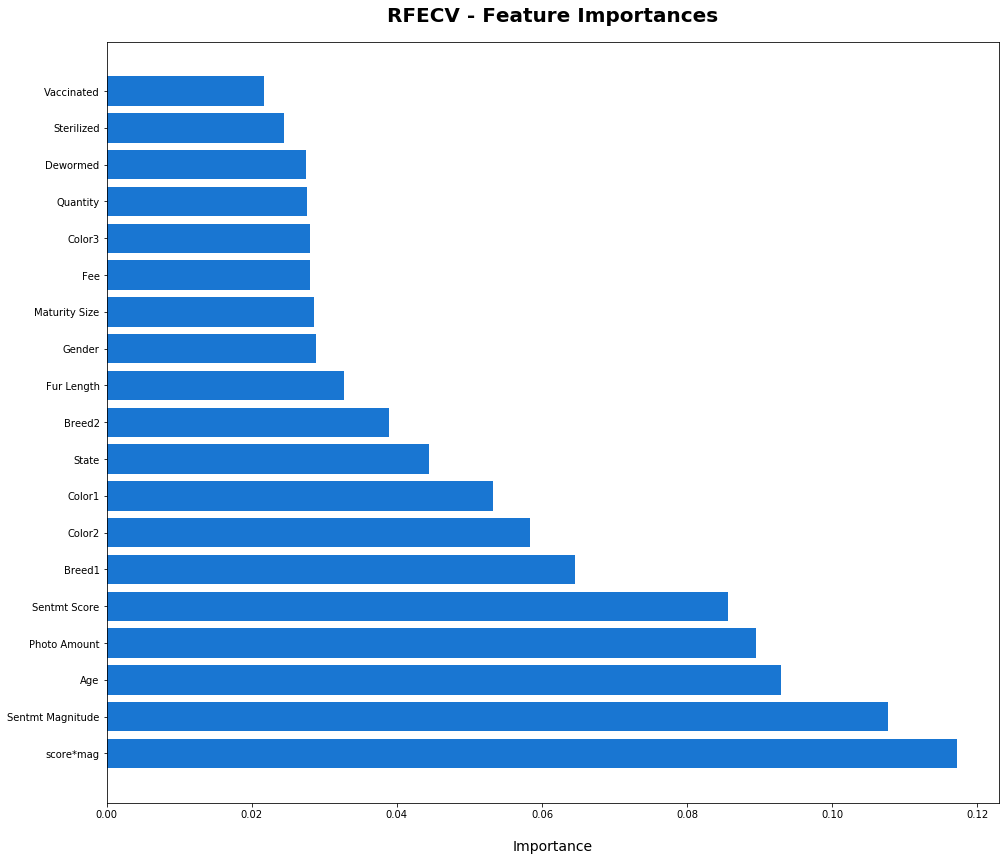

In [9]:
#A visual representation of feature importances
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=42, shuffle=True)
y_train_encoded = to_categorical(y_train, 5)
y_test_encoded  = to_categorical(y_test,  5)

model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(5, activation='softmax', kernel_initializer='random_uniform',))
model.compile(optimizer=Adam(learning_rate=0.1), loss='mse', metrics=['accuracy'])

# Train
eval_acc = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.evaluate(X_test, y_test_encoded)[1]))
model.fit(X_train, y_train_encoded, epochs=100, batch_size=200, verbose=2, class_weight=None, callbacks=[eval_acc])

In [15]:
# Evaluate
print('Evaluation:', model.evaluate(X_test, y_test_encoded)[1])

4948/4948 [==============================] - 0s 29us/step
Evaluation: 0.3811641037464142
